<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Project-Set-Up" data-toc-modified-id="Project-Set-Up-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Project Set-Up</a></span><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Home/Away-league-standings-dataset" data-toc-modified-id="Home/Away-league-standings-dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Home/Away league standings dataset</a></span></li><li><span><a href="#Fixtures-dataset" data-toc-modified-id="Fixtures-dataset-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Fixtures dataset</a></span></li></ul></li><li><span><a href="#Data-Cleaning-And-Feature-Extraction" data-toc-modified-id="Data-Cleaning-And-Feature-Extraction-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Cleaning And Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Home/Away-league-standings-dataset" data-toc-modified-id="Home/Away-league-standings-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Home/Away league standings dataset</a></span></li><li><span><a href="#Fixtures-dataset" data-toc-modified-id="Fixtures-dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Fixtures dataset</a></span></li></ul></li></ul></li><li><span><a href="#League-Standings-VS-xG-Standings" data-toc-modified-id="League-Standings-VS-xG-Standings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>League Standings VS xG Standings</a></span><ul class="toc-item"><li><span><a href="#Computing-xG-standings" data-toc-modified-id="Computing-xG-standings-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Computing xG standings</a></span></li><li><span><a href="#Assessing-Performance" data-toc-modified-id="Assessing-Performance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Assessing Performance</a></span></li></ul></li><li><span><a href="#Predicting-Final-Standings" data-toc-modified-id="Predicting-Final-Standings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predicting Final Standings</a></span><ul class="toc-item"><li><span><a href="#Introducing-The-Model" data-toc-modified-id="Introducing-The-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Introducing The Model</a></span></li><li><span><a href="#Building-the-model" data-toc-modified-id="Building-the-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Building the model</a></span></li><li><span><a href="#Importing-Data-to-the-model" data-toc-modified-id="Importing-Data-to-the-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Importing Data to the model</a></span></li><li><span><a href="#Viewing-and-Interpreting-Results" data-toc-modified-id="Viewing-and-Interpreting-Results-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Viewing and Interpreting Results</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Background

In this Notebook we first look at the current league table one week after the return of the Bundesliga after suspending it due to Coronavirus. We will look at how that compares to a league based upon [expected goals (xG)](https://fbref.com/en/expected-goals-model-explained/).

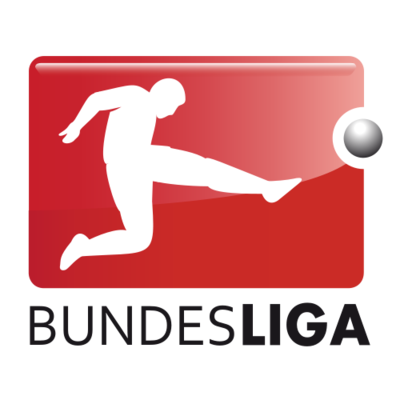

Then, we will use some of the findings found [here](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-06-04-predicting-football-results-with-statistical-modelling.ipynb) and [here](https://help.smarkets.com/hc/en-gb/articles/115001457989-How-to-calculate-Poisson-distribution-for-football-betting) in which we will use simple **Poisson model** to simulate football matches using fixtures data, finally we'll integrate that with an approach measureing **home advantage** and see how it might affect standings at the end of the season using our model.

## Project Set-Up

### Import Data

#### Home/Away league standings dataset

In [3]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson,skellam

We'll import Home/Away league standings and fixture list from [fbref.com](https://fbref.com/en/comps/20/Bundesliga-Stats) which has data that is provided from [Statsbomb](https://fbref.com/en/statsbomb/) which can be downloaded directly from the website as an excel file.

In [7]:
# Import Home/Away Dataset

home_away = pd.read_csv("home_away.csv", index_col = 'Rk')
home_away

,Squad,MP,W,D,L,GF,GA,GDiff,Pts,Pts/G,...,L.1,GF.1,GA.1,GDiff.1,Pts.1,Pts/G.1,xG.1,xGA.1,xGDiff.1,xGDiff/90.1
Rk,,,,,,,,,,,,,,,,,,,,,
1,Bayern Munich,13,9,2,2,38,11,27,29,2.23,...,2,37,15,22,29,2.23,30.3,15.7,14.6,1.13
2,Dortmund,13,10,3,0,45,10,35,33,2.54,...,4,27,23,4,21,1.62,18.4,16.8,1.6,0.12
3,M'gladbach,13,9,2,2,30,16,14,29,2.23,...,4,22,15,7,23,1.77,23.6,18.8,4.8,0.37
4,RB Leipzig,13,7,5,1,33,14,19,26,2.00,...,2,30,13,17,25,1.92,27.0,12.6,14.4,1.11
5,Leverkusen,13,7,4,2,25,13,12,25,1.92,...,4,24,18,6,25,1.92,16.5,18.9,-2.4,-0.20
6,Wolfsburg,13,4,6,3,16,13,3,18,1.38,...,4,20,18,2,21,1.62,18.4,14.9,3.5,0.27
7,Freiburg,12,6,2,4,16,14,2,20,1.67,...,5,19,22,-3,17,1.21,17.8,29.2,-11.4,-0.81
8,Schalke 04,13,5,6,2,18,18,0,21,1.62,...,5,15,22,-7,16,1.23,13.6,21.6,-8.0,-0.61
9,Hoffenheim,14,5,1,8,19,34,-15,16,1.14,...,3,16,12,4,19,1.58,13.5,18.5,-5.0,-0.42


#### Fixtures dataset

In [5]:
# Import fixture_list data
fixtures = pd.read_csv('Fix.csv')
fixtures.head(2)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1,Fri,8/16/2019,20:30 (21:30),Bayern Munich,2.7,2 2,0.9,Hertha BSC,"75,000",Allianz Arena,Harm Osmers,Match Report,NaN
1,1,Sat,8/17/2019,15:30 (16:30),Dortmund,2.4,5 1,0.7,Augsburg,"81,365",Signal Iduna Park,Frank Willenborg,Match Report,NaN


### Data Cleaning And Feature Extraction

So, we've **league standings** splitted by home and away games for each team. Also, we've the **fixtures** dataset containing matchday data.

In this section, we'll work on things we can improve in both datasets respectively.

#### Home/Away league standings dataset

The dataset has few things we can improve upon:
* The column names need cleaning - clearly differentiate between home and stats.
* Some team names needs cleaning as they've format issues - ( KÃ¶ln -> Koln )
* Calculate total points - know the overall ranking of teams.
* Drop not neccessary features for the purpose of this analysis - xG vs position.
* Create a feature to model home advantage of each team for later use.

In [1579]:
home_away = home_away.copy()
# Rename Columns to sensible names
home_away.rename(columns = {'MP': 'MP (H)', 'MP.1': 'MP (A)', 'xGDiff/90': 'xGDiff/90 (H)', 
                     'xGDiff/90.1': 'xGDiff/90 (A)', 'Pts': 'Pts (H)', 'Pts.1': 'Pts (A)', 
                        'xG': 'xG (H)', 'xG.1': 'xG (A)', 'xGA': 'xGA (H)', 'xGA.1': 'xGA (A)'
                           } , inplace = True)
# Cleaning team names
home_away.replace(to_replace = ['KÃ¶ln', 'DÃ¼sseldorf'] , value = ['Koln', 'Dusseldorf'], inplace = True)
# Extracting needed columns
home_away = home_away[['Squad', 'MP (H)', 'MP (A)', 'xGDiff/90 (H)', 'xGDiff/90 (A)', 'Pts (H)',
                       'Pts (A)', 'xG (H)', 'xG (A)', 'xGA (H)', 'xGA (A)']]
# Getting total points as a feature
home_away['Pts'] = home_away['Pts (H)'] + home_away['Pts (A)']
home_away

,Squad,MP (H),MP (A),xGDiff/90 (H),xGDiff/90 (A),Pts (H),Pts (A),xG (H),xG (A),xGA (H),xGA (A),Pts
Rk,,,,,,,,,,,,
1,Bayern Munich,13,13,1.86,1.13,29,29,35.6,30.3,11.4,15.7,58
2,Dortmund,13,13,1.02,0.12,33,21,28.4,18.4,15.2,16.8,54
3,M'gladbach,13,13,0.96,0.37,29,23,28.5,23.6,16.1,18.8,52
4,RB Leipzig,13,13,0.96,1.11,26,25,26.6,27.0,14.1,12.6,51
5,Leverkusen,13,13,1.02,-0.20,25,25,26.4,16.5,13.1,18.9,50
6,Wolfsburg,13,13,0.40,0.27,18,21,18.3,18.4,13.1,14.9,39
7,Freiburg,12,14,-0.26,-0.81,20,17,13.9,17.8,17.0,29.2,37
8,Schalke 04,13,13,-0.03,-0.61,21,16,16.0,13.6,16.3,21.6,37
9,Hoffenheim,14,12,-0.04,-0.42,16,19,23.4,13.5,23.9,18.5,35


In [1580]:
# Current league standings
standings = home_away[['Squad', 'Pts']]
standings.head(2)

,Squad,Pts
Rk,,
1,Bayern Munich,58
2,Dortmund,54


While it is widely accepted that sporting teams perform better at home, it’s impossible to create a universal home-field advantage handicap. This is due to soccer teams being fundamentally unbalanced, with some earning bigger home-field advantages than others.

We'll try to approach that with the help of a comprehnsive measure of performance for each team that is **xGDiff/90** - *measures the difference between xG scored and xG conceaded for a team over the course of one game ( **Positive value** implies that the team created more/better chances than conceaded - the higher the value the better, **Negative value** implies that a team conceaded more/better chances than created ones* - the lower the value the worse).

We'll compute **Home_adv_factor** by seeing how playing at home or not alter the team performance expressed in the **xGDiff/90** measure. Higher values for **Home_adv_factor** implies that given team's performance is more altered by where they play. We'll do so by computing the difference between **xGDiff/90**  home and away scores for each team.

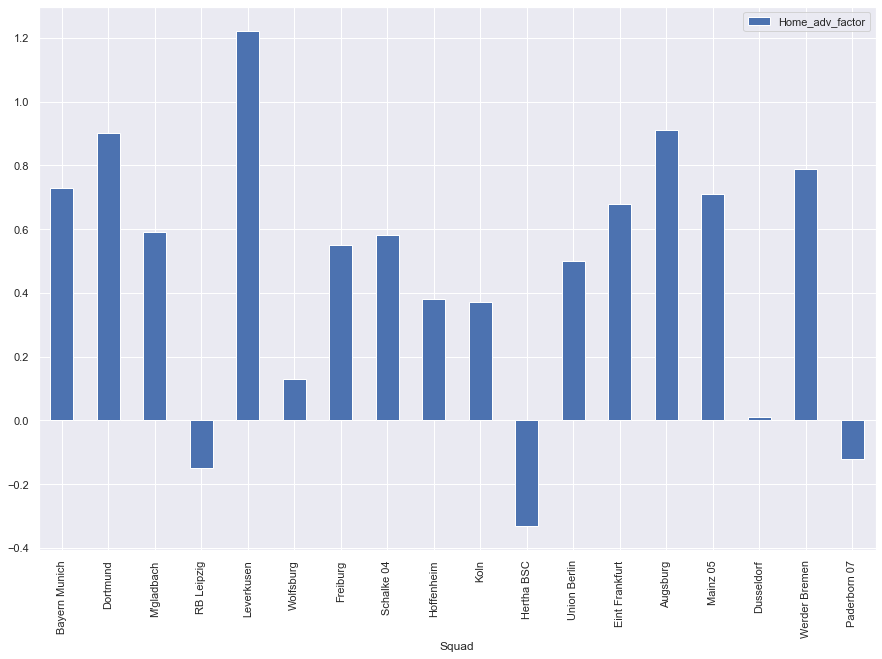

In [1581]:
home_away['Home_adv_factor'] = home_away['xGDiff/90 (H)'] - home_away['xGDiff/90 (A)']
mode = home_away[['Squad', 'Home_adv_factor']]
mode.plot(kind = 'bar' , figsize = (15,10), x = 'Squad', y = 'Home_adv_factor')


The above plot shows the computed **Home_adv_factor** scores for each team. It's quite clear that Leverkuzen has the highest value which tells that their performance improves the most when they play at home *(No team conceaded less xG at home except for Bayern Munich, at the same time they concead the most xG among the top 8 away from home)*. In contrast, Hertha Berlin who actually had better times when playing away from home *(Hertha won only 12 pts at home, while winning 19 pts away form home)* ; so their **Home_adv_factor** score reflects that with a negative value.

**Aforementioned stats** used in support of **Home_adv_factor** measure **:**

1. At home Leverkuzen conceaded less xG than anyone else bar Bayern Munich. While conceading the most among top 8 clubs away.

In [1582]:
home_away[['Squad', 'xGA (H)']].sort_values('xGA (H)').head()

,Squad,xGA (H)
Rk,,
1,Bayern Munich,11.4
5,Leverkusen,13.1
6,Wolfsburg,13.1
17,Werder Bremen,13.5
4,RB Leipzig,14.1


In [1583]:
home_away[['Squad', 'xGA (A)']].sort_values('xGA (A)').head(8)

,Squad,xGA (A)
Rk,,
4,RB Leipzig,12.6
6,Wolfsburg,14.9
1,Bayern Munich,15.7
2,Dortmund,16.8
13,Eint Frankfurt,17.9
9,Hoffenheim,18.5
3,M'gladbach,18.8
5,Leverkusen,18.9


2. While being 11th Hertha won less points at home than anyone else except bottom 2 clubs in the table.

In [1584]:
home_away[['Squad', 'Pts (H)']].sort_values('Pts (H)').head(3)

,Squad,Pts (H)
Rk,,
17,Werder Bremen,5
18,Paderborn 07,7
11,Hertha BSC,12


#### Fixtures dataset

The dataset has few things we can improve upon:
* The column names need cleaning - clearly differentiate between home and stats.
* Some team names needs cleaning as they've format issues - ( KÃ¶ln -> Koln )
* Differentiate between the fixtures already played and the ones to be played - extract remaining_fixtures dataset.
* Drop not neccessary features for the purpose of this analysis - predincting final standings. 

In [1585]:
# Recall info about the dataset
fixtures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 14 columns):
Wk              306 non-null float64
Day             306 non-null object
Date            306 non-null datetime64[ns]
Time            279 non-null object
Home            306 non-null object
xG              233 non-null float64
Score           233 non-null object
xG.1            233 non-null float64
Away            306 non-null object
Attendance      223 non-null float64
Venue           306 non-null object
Referee         233 non-null object
Match Report    233 non-null object
Notes           0 non-null float64
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 37.4+ KB


We see by looking to number of non-null values that there exist many features containing null values, and this isn't due to error but having some fixtures in the fixtures' list still not played so their data doesn't yet exist. We'll handle that by having two different datasets one containing the fixtures that have been played *(will use in developing the model)* and the other containing the fixtures yet to be played *(will use the model to predict its outcome)*.

In [1586]:
# Cleaning column names
fixtures.rename(columns = {'xG': 'xG (H)', 'xG.1': 'xG (A)'}, inplace = True)
# Cleaning team names
fixtures.replace(to_replace = ['KÃ¶ln', 'DÃ¼sseldorf'] , value = ['Koln', 'Dusseldorf'], inplace = True)
# Removing rows containing absloutely no information
fixtures.dropna(how = 'all', inplace = True)

In [1587]:
# Extract dataset for the remaining_fixtures leaving the fixtures dataset containing games already played
remaining_fixtures = fixtures[fixtures['xG (H)'].isnull()] 
remaining_fixtures = remaining_fixtures[['Home', 'Away']].reset_index()
del remaining_fixtures['index']
remaining_fixtures.head(2)

,Home,Away
0,Hertha BSC,Union Berlin
1,Wolfsburg,Dortmund


In [1588]:
# Extracting needed features and cleaning dataset
fixtures = fixtures.copy()
fixtures = fixtures[['Home', 'Away', 'xG (H)', 'xG (A)']]
# Removing fixtures still to be played.
fixtures.dropna(how='any', inplace = True, axis = 'rows')


## League Standings VS xG Standings

Expected goals (xG) scored and conceded (xGA) take into account how many goals there should be by each team in a game based upon their performance. We can use these two values to create another table. Comparing goals scored and goals conceded for each game allows us to work out the result.

To do this, we must first check who won each game based upon the expected goals. Since expected goals can be a decimal number, we round them to the nearest whole number. Without some method of rounding, we are unlikely to see any draws in this data (which we know are actually common in football). 

### Computing xG standings

In [1589]:
# Rounding expected goals scored and conceaded for each team.
fixtures['xG_rounded (H)'] = fixtures['xG (H)'].apply(lambda x: round(x))
fixtures['xG_rounded (A)'] = fixtures['xG (A)'].apply(lambda x: round(x))
fixtures = fixtures[['Home', 'Away', 'xG_rounded (H)', 'xG_rounded (A)']]

In [1590]:
# Simulating game results based on expected goals.
fixtures['xwin'] = fixtures.apply(lambda x: 1 if x['xG_rounded (H)'] > x['xG_rounded (A)'] else 0, axis=1)
fixtures['xdraw'] = fixtures.apply(lambda x: 1 if x['xG_rounded (H)'] == x['xG_rounded (A)'] else 0, axis=1)
fixtures['xloss'] = fixtures.apply(lambda x: 1 if x['xG_rounded (H)'] < x['xG_rounded (A)'] else 0, axis=1)

The following cell will compute the league standings based on xG.

In [1591]:
# xG Position
# Get the results for each team
x_team_results = []
for team in squad_list:
    # Get the data for that team
    team_data_home = fixtures[fixtures['Home'] == team]
    team_data_away = fixtures[fixtures['Home'] == team]
    
    
    wins = team_data_home['xwin'].sum()
    draws = team_data_home['xdraw'].sum()
    losses = team_data_home['xloss'].sum()
    scored = team_data_home['xG_rounded (H)'].sum()
    conceded = team_data_home['xG_rounded (A)'].sum()
    
    wins_a = team_data_away['xwin'].sum()
    draws_a = team_data_away['xdraw'].sum()
    losses_a = team_data_away['xloss'].sum()
    scored_a = team_data_away['xG_rounded (H)'].sum()
    conceded_a = team_data_away['xG_rounded (A)'].sum()
    
    games = wins + draws + losses + wins_a + draws_a + losses_a
    points = (3 * wins) + draws + (3 * wins_a) + draws_a
    goal_difference = (scored - conceded) + (scored_a - conceded_a)
    
    x_team_results.append([team, games, wins+wins_a , draws + draws_a , losses + losses_a
                           , scored + scored_a, conceded + conceded_a, 
                           goal_difference, points])
x_league_table = pd.DataFrame(x_team_results, 
                              columns=['Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Points'])
x_league_table.sort_values(by=['Points', 'GD', 'F'], ascending=False, inplace=True)
x_league_table.set_index(np.array(range(1, 19)), inplace=True)

In [1592]:
x_league_table.index.names = ['xG_Position']
x_league_table

,Team,P,W,D,L,F,A,GD,Points
xG_Position,,,,,,,,,
1,Bayern Munich,26,24,2,0,74,22,52,74
2,Leverkusen,26,20,4,2,56,26,30,64
3,RB Leipzig,26,16,8,2,56,26,30,56
4,M'gladbach,26,18,2,6,58,36,22,56
5,Dortmund,26,16,6,4,56,34,22,54
6,Wolfsburg,26,10,14,2,36,26,10,44
7,Augsburg,26,14,2,10,40,36,4,44
8,Hoffenheim,28,10,12,6,48,46,2,42
9,Eint Frankfurt,26,8,12,6,44,40,4,36


### Assessing Performance

The following cell compares current league position to the expected league tables' positions. 

We can determine whether a team is overperforming based upon whether their current position is above their expected position.

**Overperforming:** Dortmund, M'gladbach, Freiburg, Schalke 04, Koln, Hertha BSC, Dusseldorf.

**Not Overperforming:** Bayern Munich, RB Leipzig, Leverkusen, Wolfsburg, Hoffenheim, Union Berlin, Eint Frankfurt, Augsburg, Mainz 05, Werder Bremen, Paderborn 07.

In [1593]:
team_positions = []
for team in squad_list:
    current_pos = standings[standings['Squad'] == team].index[0]
    xg_pos = x_league_table[x_league_table['Team'] == team].index[0]
    overperforming = 'Yes' if current_pos < xg_pos else 'No'
    team_positions.append([team, current_pos, xg_pos,  overperforming])

position_table = pd.DataFrame(team_positions, columns=['Team', 'Position', 'xG Position',
                                                       'Overperforming'])
position_table.sort_values(by=['Position'], ascending=True, inplace=True)

In [1594]:
position_table.head(18)

,Team,Position,xG Position,Overperforming
0,Bayern Munich,1,1,No
1,Dortmund,2,5,Yes
2,M'gladbach,3,4,Yes
3,RB Leipzig,4,3,No
4,Leverkusen,5,2,No
5,Wolfsburg,6,6,No
6,Freiburg,7,15,Yes
7,Schalke 04,8,12,Yes
8,Hoffenheim,9,8,No
9,Koln,10,10,No


## Predicting Final Standings

We'll use simple model to predict the final standings in this Bundesliga campaign while noting the home_adv_factor we computed earlier, this measure might also be useful in monitoring how league standings might be affected with games being palyed behind closed doors or in entirely different locations which mean the home advantage might be completely, or at least partially lost.

### Introducing The Model

This is a convenient time to introduce the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). It's a discrete probability distribution that describes the probability of the number of events within a specific time period (e.g 90 mins) with a known average rate of occurrence. A key assumption is that the number of events is independent of time. In our context, this means that goals don't become more/less likely by the number of goals already scored in the match.


Note that we treat the number of goals scored by the home and away team as two independent Poisson distributions, thus we consider the number of goals scored by each team to be independent events (i.e. P(A n B) = P(A) P(B)). So, if two teams scored the same amount of goals ( same number of events happenend ) in the same game ( within the same specific time period ) the difference between the poisson distribution - this is actually called [Skellam distribution](https://en.wikipedia.org/wiki/Skellam_distribution) will be zero. And to get the probability of that happening, we just input the mean goals' value ( in draw case 0 ) to the skellam's [probability mass function (PMF) ](https://en.wikipedia.org/wiki/Probability_mass_function).

So, in order to adapt this approach to model specific matches. We just need to know the average number of goals scored by each team and feed this data into a Poisson model.

If you're curious to know more about how poisson distribution can be used to approximate the number of goals scored by each team, you can find the details of the model [here](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-06-04-predicting-football-results-with-statistical-modelling.ipynb).

### Building the model

As mentioned in the preceding section, we could calculate the probability of various events in any specfic match *(using Skellam distribution to monitor goal difference, thus know match results)*. But rather than treat each match separately, we'll build a more general [Poisson regression model](https://en.wikipedia.org/wiki/Poisson_regression). 

In [1595]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

def model(goal_model_data, home_adv):
    if home_adv == 1:
        poisson_model = smf.glm(formula="goals ~  home +  team + opponent  ", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
        print(poisson_model.summary())
    else:
        poisson_model = smf.glm(formula="goals ~  team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
        print(poisson_model.summary())
    return poisson_model

The specs of the model should be printed each time the function is called, we'll use the model in different situations later so we'll look at its specs then.

As mentioned before, we have two Poisson distributions. From this, we can calculate the probability of various events. simulate_match function wraps this up.

In [1596]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals , home_adv):
    if home_adv == 1:
        home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
        away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    else:
        home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam, 'home': 0},
                                                      index=[1])).values[0]
        away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam, 'home': 0},
                                                      index=[1])).values[0]
            
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

### Importing Data to the model

In contrast to the [intial](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-06-04-predicting-football-results-with-statistical-modelling.ipynb) use of the model which used goals data to develop the poisson regression model, we'll use expected goals values which is a more consistent measure of performance to express each team's chances/probability to score goals within one game.

Expected Goals is typically a more consistent measure of performance than actual goals. Whereas goals are relatively rare events that come and go in stretches, a team or player’s xG output tends to fluctuate much less from match-to-match. Clearly the goals that are actually scored are the ones that win points, but xG gives us more context for evaluating team performance. More on that [here](https://www.optasportspro.com/news-analysis/blog-expected-goals-in-context/).

We'll simulate the cases where the home advantage plays its normal part for each team expressed in the computed **Home_adv_factor**, and also the case where it's **neglected** due to playing the league behind closed you'd expect that teams that improve the most when playing at home *(for e.g Leverkuzen)* to be most affected and teams that suffer at home maybe to show no affection to that.
Also it's intuitive to say that this assumption *( neglecting home advantage )* is not 100% accurate; as fans are not the only factor that contribute to home advantage of sport teams, other factors like ( Stadium Familiarity, Style of football .. ) might have some contribution to that but it's something that can be approached but not particularly measured. In this simulation we only try to approach who playing behind closed doors might affect the most, and how this will affect league standings at the end.

**Steps for importing data to the model**:
* Drop not needed features for model computations
* Give features meaningful names
* Write method to simulate the remaining fixtures of the league campaign

In [1597]:
df_xG = pd.concat([fixtures[['Home','Away','xG_rounded (H)']].assign(home=1).rename(
            columns={'Home':'team', 'Away':'opponent','xG_rounded (H)':'goals'}),
                             fixtures[['Away','Home','xG_rounded (A)']].assign(home=0).rename(
            columns={'Away':'team', 'Home':'opponent','xG_rounded (A)':'goals'})], sort = False)
df_xG.tail(2)

,team,opponent,goals,home
257,Bayern Munich,Union Berlin,2,0
258,Leverkusen,Werder Bremen,2,0


In [1598]:
# Method to compute rank for each team while simulating its league campaign
def compute_rank(data, home_adv = 1, r = remaining_fixtures, home_away = home_away):
    winners = []
    poisson_model = model(data, home_adv)
    for home,away in r.values:
        avg_no_of_goals = poisson_model.predict(pd.DataFrame(data={'team': home, 'opponent': away,
                                       'home':1},index=[1]))
        to_fn = int((avg_no_of_goals.values[0]))
        match_sim = simulate_match(poisson_model, home, away, to_fn, home_adv)
        result = np.argmax(np.array([np.sum(np.tril(match_sim, -1)), np.sum(np.diag(match_sim)),
                                np.sum(np.triu(match_sim, 1))]))
    
        if result == 0 :
                winner = home
        elif result == 1:
                winner = 'None'
        else:
                winner = away

        winners.append(winner)
    winners = pd.DataFrame(winners)
    r = pd.concat([r, winners], axis = 1)
    r.columns = ['Home', 'Away', 'Winner']
    wins_pts = pd.DataFrame((r['Winner'].value_counts()) *3)
    wins_pts = wins_pts.drop('None')
    draws = r[r['Winner'] == 'None']
    draws_pts_h = pd.DataFrame(draws['Home'].value_counts())
    draws_pts_a = pd.DataFrame(draws['Away'].value_counts())
    Total = pd.concat([wins_pts, draws_pts_h, draws_pts_a], axis = 1, sort = True)
    Total.fillna(0, inplace = True)
    Total['Total_pts_to_be_Added'] = (Total.Winner + Total.Home + Total.Away).astype(int)
    Total.sort_values('Total_pts_to_be_Added', ascending = False)
    home_away = home_away.set_index('Squad')
    Results = pd.concat([home_away['Pts'], Total], axis = 1, sort = False)
    Results = Results.fillna(0)
    Ranking = pd.DataFrame(Results['Pts'] + Results['Total_pts_to_be_Added'])
    Ranking.columns = ['Points']
    Ranking = Ranking.astype({'Points': int})
    Ranking.sort_values('Points', ascending = False, inplace = True)
    Ranking.reset_index(inplace = True)
    Ranking.index.name = 'Predicted Position'
    Ranking.index += 1
    Ranking.rename( columns = {'index': 'Teams'}, inplace = True)
    return Ranking

### Viewing and Interpreting Results

In this section we will view the results of our model with and without home_adv as modeled in above sections. 
Also, will go further in illustrating the model used by commenting on its specs when it is used.

In [1599]:
# League Table Ranking predicted through xG with Home Advantage for each team
xG_rankings_with_home_adv = compute_rank(df_xG)
xG_rankings_with_home_adv

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  goals   No. Observations:                  466
Model:                            GLM   Df Residuals:                      430
Model Family:                 Poisson   Df Model:                           35
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -602.53
Date:                Thu, 21 May 2020   Deviance:                       206.72
Time:                        05:14:25   Pearson chi2:                     178.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

,Teams,Points
Predicted Position,,
1,Bayern Munich,74
2,Dortmund,68
3,RB Leipzig,65
4,M'gladbach,63
5,Leverkusen,60
6,Wolfsburg,47
7,Schalke 04,45
8,Freiburg,44
9,Hoffenheim,42


Our main interest here lies in the values presented in the coef column in the model summary table, which are analogous to the slopes in linear regression. Similar to [logistic regression](https://www.statisticssolutions.com/what-is-logistic-regression/), we take the [exponent of the parameter values](http://www.lisa.stat.vt.edu/sites/default/files/Poisson.and_.Logistic.Regression.pdf). A positive value implies more goals , while values closer to zero represent more neutral effects. Towards the bottom of the table you might notice that home has a coef of 0.2852. This captures the fact that home teams generally score more goals than the away  *(exp(0.2852) = 1.33 times more likely )*. But not all teams are created equal. Bayern Munich has an estimate of *0.6266* corresponding to *-0.2505*  of Dusseldorf which is the weakest attack in the league *( sort of saying Bayern Munich are better scorers- in xG context better creators than average while Dusseldorf are much worse)*.

 Finally, the opponent values penalize/reward teams based on the quality of the opposition. This reflects the defensive strength of each team (Bayern Munich : -0.3657; Dusseldorf: 0.1914). In other words, you're less likely to score against Bayern Munich. Hopefully, that all makes both statistical and intuitive sense

In [1600]:
# League Table Ranking predicted through xG without the home advantage
xG_rankings_without_home_adv = compute_rank(df_xG,0)
xG_rankings_without_home_adv

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  goals   No. Observations:                  466
Model:                            GLM   Df Residuals:                      431
Model Family:                 Poisson   Df Model:                           34
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -604.42
Date:                Thu, 21 May 2020   Deviance:                       210.50
Time:                        05:14:26   Pearson chi2:                     181.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

,Teams,Points
Predicted Position,,
1,Bayern Munich,74
2,RB Leipzig,65
3,Dortmund,64
4,M'gladbach,63
5,Leverkusen,60
6,Wolfsburg,47
7,Schalke 04,45
8,Freiburg,44
9,Hoffenheim,43


Now let's examine the effects our model has shown when home_adv_factor measure is neglected. We'll do so by comparing the league position by our model in both scenarios and see what are the teams that are affected and if this effect is positive or negative one for them, then try to understand that in the context of the Home_adv_factor we computed earlier.

In [1601]:

pos = []
for team in squad_list:
    home_pos = xG_rankings_with_home_adv[xG_rankings_with_home_adv['Teams'] == team].index[0]
    no_home_pos = xG_rankings_without_home_adv[xG_rankings_without_home_adv['Teams'] == team].index[0]
    affected = 'Yes' if home_pos != no_home_pos else 'No'
    pos.append([team, home_pos, no_home_pos, affected])
    
cmp_table = pd.DataFrame(pos, columns = ['Team', 'Position_with_home_adv', 'Position_without_home_adv', 'affected']) 

Looking to the following table:

**Affected:** Dortmund, RB Liepzig, Eint Frankfurt, Hertha Berlin.

While all other teams showed no affection.

The obvious improvement was shown by Hertha Berlin *(14th to 11th)* who enjoyed better times away; so losing the home advantage was a bless in disguise for them. In contrast to other teams especially Eint Frankfurt who suffered the most *(11th to 13th)* with them being in the highest 5 values of Home_adv_factor. However, neutralizing grounds for all teams had no major effect on the league table as no changes happen in the very top of the table *(Bayern well clear of the rest)*, also the top 4 battle had no major changes as well as the bottom of the table.

In [1602]:
cmp_table.set_index('Team', inplace = True)
cmp_table.sort_values('Position_with_home_adv')

,Position_with_home_adv,Position_without_home_adv,affected
Team,,,
Bayern Munich,1,1,No
Dortmund,2,3,Yes
RB Leipzig,3,2,Yes
M'gladbach,4,4,No
Leverkusen,5,5,No
Wolfsburg,6,6,No
Schalke 04,7,7,No
Freiburg,8,8,No
Hoffenheim,9,9,No


## Model Evaluation

Our model was founded on the belief that the number goals can be accurately expressed as a Poisson distribution. If that assumption is misguided, then the model outputs will be unreliable. Given a Poisson distribution with mean $\lambda$, then the number of events in half that time period follows a Poisson distribution with mean $\lambda$/2. In football terms, according to our Poisson model, there should be an equal number of goals in the first and second halves. This is obviously not true which implies that univariate poisson distribution isn't the most accurate way to approach this simulation, and more success with [bivariate poisson distribution](http://www2.stat-athens.aueb.gr/~karlis/Bivariate%20Poisson%20Regression.pdf). More on that can be founded in this [notebook](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-06-04-predicting-football-results-with-statistical-modelling.ipynb) where this simulation is inspired by.

## Conclusion

We built a simple Poisson model to predict the results of the Bundesliga season. Despite its inherent flaws, it recreates several features that would be a necessity for any predictive football model (home advantage, varying offensive strengths and opposition quality). We also modeled results for the season without taking home advantage into prespective and saw that this would introduce slight changes that can be understood when looking to the  Home advantage factor computed earlier in the notebook.

Earlier in the study we took a quick analysis on which teams overperformed their expected numbers, and built or numbers on the basis of expected numbers.